<a href="https://colab.research.google.com/github/TyllerDaniel/cifar10-image-classification-using-Keras/blob/main/Imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt
(train_X, train_Y), (test_X,test_Y) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


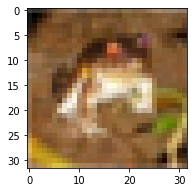

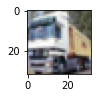

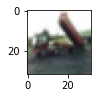

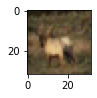

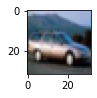

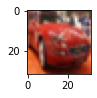

In [7]:
#Visualize the imported dataset
n = 6
plt.figure(figsize=(20,10))
for i in range(n):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_X[i])
  plt.show()

In [8]:
# import the required modules for CNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [9]:
#Convert the pixel values of the dataset to float and normalize the dataset

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X = train_X/255.0
test_X = test_X/255.0

In [10]:
#Perform one-hot encoding for target classes

train_Y = np_utils.to_categorical(train_Y)
test_Y = np_utils.to_categorical(test_Y)

num_classes = test_Y.shape[1]

In [12]:
#Creating the model and adding the layers.

model = Sequential()
model.add (Conv2D(32,(3,3),input_shape = (32,32,3),
                  padding = 'same',activation = 'relu',
                  kernel_constraint = maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',
                 padding = 'same', kernel_constraint = maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

In [14]:
#Optimizer Configuration.

sgd = SGD(learning_rate=0.01,momentum=0.9, decay= (0.01/25),nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy']) 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [16]:
# Train the model.

model.fit(train_X,train_Y,validation_data=(test_X,test_Y),
          epochs=10, batch_size = 32)

Epoch 1/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.9313 - accuracy: 0.2982 - val_loss: 1.4019 - val_accuracy: 0.4959
Epoch 2/10
1563/1563 [==============================] - 204s 131ms/step - loss: 1.4211 - accuracy: 0.4887 - val_loss: 1.2318 - val_accuracy: 0.5625
Epoch 3/10
1563/1563 [==============================] - 204s 131ms/step - loss: 1.2228 - accuracy: 0.5642 - val_loss: 1.1039 - val_accuracy: 0.6057
Epoch 4/10
1563/1563 [==============================] - 205s 131ms/step - loss: 1.0743 - accuracy: 0.6176 - val_loss: 1.0726 - val_accuracy: 0.6186
Epoch 5/10
1563/1563 [==============================] - 204s 131ms/step - loss: 0.9735 - accuracy: 0.6567 - val_loss: 0.9702 - val_accuracy: 0.6593
Epoch 6/10
1563/1563 [==============================] - 205s 131ms/step - loss: 0.8703 - accuracy: 0.6947 - val_loss: 0.9447 - val_accuracy: 0.6669
Epoch 7/10
1563/1563 [==============================] - 205s 131ms/step - loss: 0.7904 - accuracy: 0.7189 - val_

In [17]:
#Getting the accuracy of the model
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 8s 25ms/step - loss: 0.9070 - accuracy: 0.6890
68.90000104904175


In [18]:
#Save the model
model.save("model1_cifar_10epoch.h5")

In [20]:
#Make a dictionary to map to the output classes and make predictions from the model.
results = {
    0: 'aeroplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}



In [22]:
from google.colab import files
uploaded = files.upload()

Saving stallion.jpg to stallion.jpg


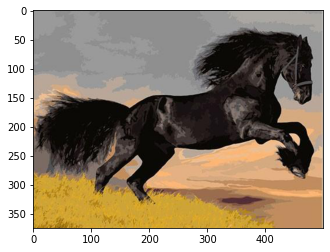

In [38]:
from PIL import Image
from io import BytesIO
import numpy as np
#im = Image.open('stallion.jpg')
im = Image.open(BytesIO(uploaded['stallion.jpg']))
plt.imshow(im)
plt.show()

In [44]:

im = Image.open('stallion.jpg')
im = im.resize((32,32))
im = np.expand_dims(im,axis=0)
im = np.array(im)
#pred = model.predict([im])
pred = model.predict_classes([im])[0]
#pred = np.argmax(model.predict[im])[0]
print(np.argmax(pred))
#print(pred,results[pred])

0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [84]:
im = Image.open('stallion.jpg')
im = im.resize((32,32))
im = np.expand_dims(im,axis=0)
im = np.array(im)
#pred = model.predict(im)
pred = np.argmax(model.predict([im]))
pred_name = results[np.argmax(pred)]
print(pred)
print(pred_name)

0
aeroplane


ERROR: Could not find a version that satisfies the requirement python3-tk (from versions: none)
ERROR: No matching distribution found for python3-tk


In [99]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [88]:
from keras.models import load_model
model = load_model('model1_cifar_10epoch.h5')

In [89]:
classes = { 
    0:'aeroplane',
    1:'automobile',
    2:'bird',
    3:'cat',
    4:'deer',
    5:'dog',
    6:'frog',
    7:'horse',
    8:'ship',
    9:'truck' 
}

In [106]:
!apt-get install -y xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 784 kB of archives.
After this operation, 2,270 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.8 [784 kB]
Fetched 784 kB in 1s (612 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 145480 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.8_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.8) ...
Setting up xvfb (2:1.19.6-1ubuntu4.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [107]:
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0

In [110]:


#Initialize GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Image Classification CIFAR10')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
        (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
  
        upload=Button(top,text="Upload an image",command=upload_image,
        padx=10,pady=5)

        upload.configure(background='#364156', foreground='white',
        font=('arial',10,'bold'))

        upload.pack(side=BOTTOM,pady=50)
        sign_image.pack(side=BOTTOM,expand=True)
        label.pack(side=BOTTOM,expand=True)
        heading = Label(top, text="Image Classification CIFAR10",pady=20, font=('arial',20,'bold'))

        heading.configure(background='#CDCDCD',foreground='#364156')
        heading.pack()
        top.mainloop()

